In [1]:
import pandas as pd
df=pd.read_csv("Ntu_Orders.csv")
df[:3]

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,350.0,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False


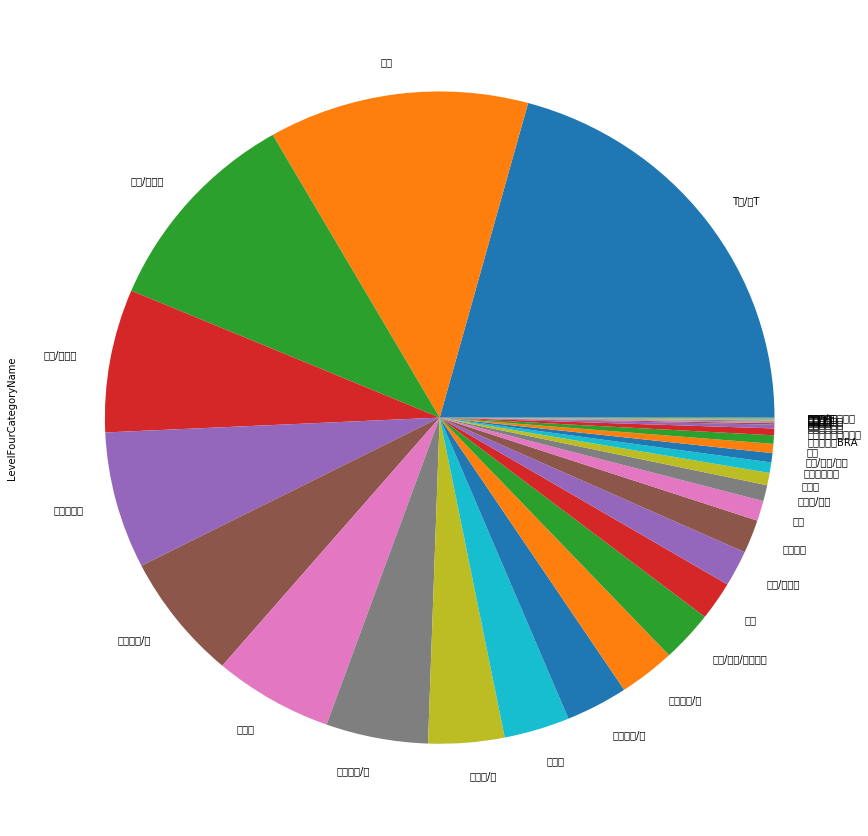

In [13]:
item=df["LevelFourCategoryName"].value_counts()
item.plot.pie(figsize=(15,15))


# how to show in chinese？

In [12]:
df["new_DateId"]=pd.to_datetime(df["DateId"].astype(str),format="%Y%m%d")
newdateid_quantity = df.groupby(by='new_DateId')['Quantity'].sum()
newdateid_quantity[:10]

new_DateId
2017-01-01    3823
2017-01-02    5105
2017-01-03    3623
2017-01-04    2889
2017-01-05    2843
2017-01-06    2391
2017-01-07    2641
2017-01-08    2335
2017-01-09    2119
2017-01-10    2470
Name: Quantity, dtype: int64

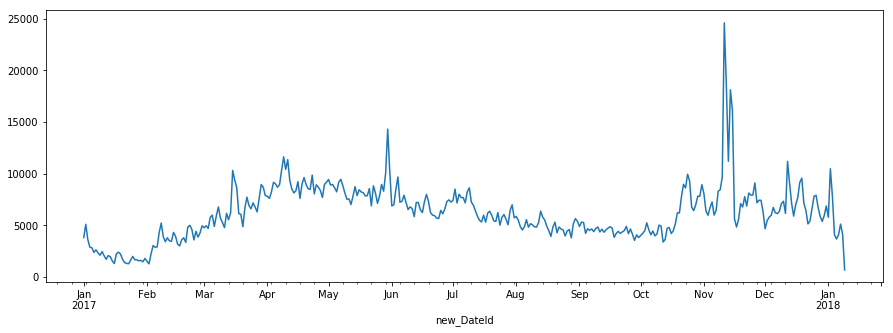

In [4]:
newdateid_quantity.plot(figsize=(15,5))

In [5]:
is_PromotionDiscount=df["PromotionDiscount"]<0
is_EcouponDiscount=df["EcouponDiscount"]!=0
discount=df[is_PromotionDiscount | is_EcouponDiscount]
discount[:5]

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False,2017-01-01
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,-57.0,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False,2017-01-01
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,-44.0,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False,2017-01-02


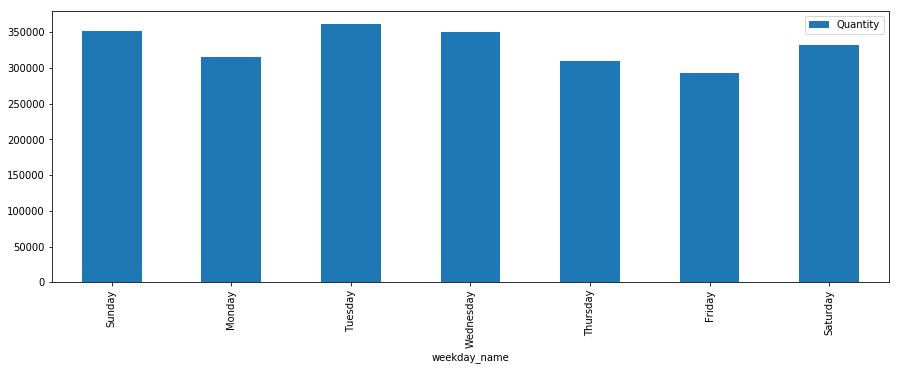

In [6]:
# how to add column in newid_quantity？
# how to get newdateid_quantity ["Quantity"]？
# how to draw bar picture from weekday and quantity？


a=[]
def Get_weekday(day):
    temp=newdateid_quantity[weekday_list==day].sum()
    a.append(temp)

weekday_list=newdateid_quantity.index.weekday_name
weekday_name=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

for i in weekday_name:
    Get_weekday(i)
w={"weekday_name":weekday_name,"Quantity":a}
weekday=pd.DataFrame(w)
weekday=weekday.set_index("weekday_name")
weekday.plot(kind="bar",figsize=(15,5))

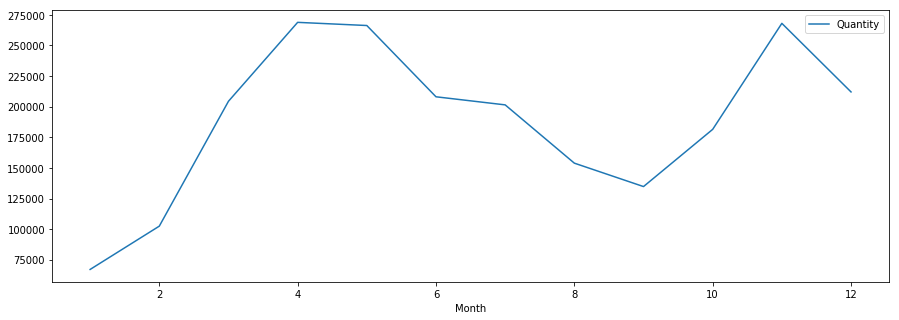

In [20]:
is_2017=newdateid_quantity.index.year==2017
newdateid_quantity_2017=newdateid_quantity[is_2017]
month_list=newdateid_quantity_2017.index.month


m=[]
def Get_month(month):
    temp=newdateid_quantity_2017[month_list==month].sum()
    m.append(temp)
month_name=[1,2,3,4,5,6,7,8,9,10,11,12]
for i in month_name:
    Get_month(i)
month_data={"Month":month_name,"Quantity":m}
month_quantity=pd.DataFrame(month_data)
month_quantity=month_quantity.set_index("Month")
month_quantity.plot(figsize=(15,5))

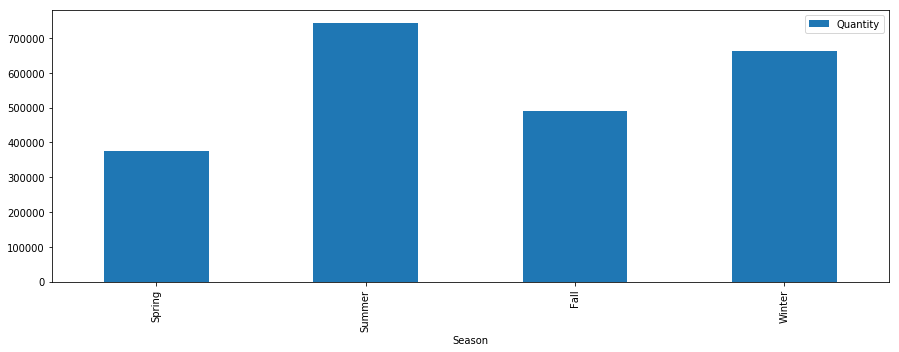

In [21]:
season=["Spring","Summer","Fall","Winter"]
s=[m[0]+m[1]+m[2],m[3]+m[4]+m[5],m[6]+m[7]+m[8],m[9]+m[10]+m[11]]
season_quantity_dic={"Season":season,"Quantity":s}
season_quantity=pd.DataFrame(season_quantity_dic)
season_quantity=season_quantity.set_index("Season")
season_quantity.plot(kind="bar",figsize=(15,5))

In [8]:
# find main custom by quantity


costumer_quantity = df.groupby(by='MemberId')['Quantity'].sum()
main_costumer=costumer_quantity[costumer_quantity>costumer_quantity.mean()+2*costumer_quantity.std()]
main_costumer.sort_values(ascending=False)[:10]

MemberId
33F9043B-28C3-44CC-B1FA-07DFE3D8328A    2616
000A8916-E35D-4590-84FF-F67075DA2786    1932
40147018-9A91-49E8-9D46-B0618C46C0B4     790
0E4F06E7-650A-4764-B122-F147DEDABB1E     663
1FA51182-83B2-429D-87E7-1A9022298AA8     649
FCE573AA-5581-432A-9262-AF32BB381169     603
E3470FD0-830D-4800-B253-F12210ACA41B     486
00AE1ADC-593B-4C23-B6E6-814DB0D333C5     482
725C0679-97AC-47AD-8FC5-B1C4099285BA     478
6378F1B8-D5B8-4BDE-8A23-D18A010A55A0     424
Name: Quantity, dtype: int64

In [22]:
is_duplicate=df.duplicated('MemberId')
df[is_duplicate]


# why memoryerror？

MemoryError: 